## Data Preparation

Prepare the dataset for more elaborate analysis that typically involves machine learning algorithms

## A. Import Python Modules and Dataset

In [1]:
# Import the relevant python modules

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import MissingIndicator
import matplotlib.pyplot as plt
%matplotlib inline

# Import the bank dataset and check the import was successful

df = pd.read_csv('C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week2/bank.csv')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [2]:
# Create a copy of the dataset in case we need to revert to it

df_original = df

In [3]:
# Show statistics for the numerical and categorical attributes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
age           1988 non-null float64
job           1990 non-null object
marital       2000 non-null object
education     1896 non-null object
default       2000 non-null object
balance       2000 non-null int64
housing       2000 non-null object
loan          2000 non-null object
contact       1809 non-null object
day           2000 non-null int64
month         2000 non-null object
duration      2000 non-null int64
campaign      2000 non-null int64
pdays         2000 non-null int64
previous      2000 non-null int64
poutcome      1546 non-null object
subscribed    2000 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [4]:
# Check for amount of NaNs in the numerical and categorical attributes

df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

## B. Process and Encode the Categorical Features    

### Encode Ordinal Categorical Attributes 

Note that there are only two categorical columns (`education` and `month`) that are **ordinal**; all other categorical columns are **nominal**.

In [5]:
# Create a mapper for `education` and check it was successful

scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
# Create a mapper for `month` and check it was successful

scale_mapper2 = {
    "jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11
}

df['month'] = df['month'].replace(scale_mapper2)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


## C(a). Treatment of Missing Values in Numerical Columns

In [7]:
# I noticed that the job type may provide a more accuate indicator of age than the overall age median
# But I need to apply it before I one-hot encode the 'job' attribute
# I couldn't adapt the pivot table method for the lab2 example to apply the median age per job type
# But courtesy of Eithne Crowley from the forum her method works:

# Calculate and store the median values for each unique job type
medians = {}
for job in [j for j in df['job'].unique() if j is not np.nan]:
    medians[job] = df.query(f'job=="{job}"').loc[:, "age"].median()

# Use a lambda function to update the 'age' attribute based on the 'job' type median age.
df['age'] = df.apply(lambda x: medians[x.job] if np.isnan(x.age) else x.age, axis=1)

### One-Hot Encode All Other Categorical Attributes

In [8]:
# one-hot encode the categorical columns with NaNs

    df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], dummy_na=True, drop_first=True)
    df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,8,327,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,8,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,8,231,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,8,185,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,8,208,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# now one-hot encode all other categorical columns

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,2.0,392,1,3,957,2,131,2,0,...,0,0,0,0,0,1,0,1,0,0
1,39.0,1.0,688,1,3,233,2,133,1,0,...,0,0,0,0,0,0,0,1,1,0
2,59.0,1.0,1035,1,3,126,2,239,1,0,...,0,0,0,0,1,0,0,1,1,0
3,47.0,1.0,398,1,3,274,1,238,2,1,...,0,0,0,0,1,0,0,1,1,0
4,54.0,1.0,1004,1,3,479,1,307,1,0,...,0,0,0,0,1,0,0,1,0,0


## C(b). Treatment of Missing Values in Numerical Columns

In [10]:
# The -1 values from 'pdays' means that the customer was not previously contacted
# This information is also avaialbe from the zero values of 'previous'
# Therefore I will replace the -1 values with NaNs to be treated later with other attibutes with NaNs
# and check the replacement was succesful

df['pdays'].replace({-1: np.nan}, inplace=True)

In [11]:
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,NaN,2785,16,8,327,2,NaN,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,1.0,127,16,8,1334,2,NaN,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,0.0,1154,17,8,231,1,NaN,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,0.0,4343,20,8,185,1,NaN,0,0,...,1,0,0,1,1,0,0,1,0,1
1999,40.0,1.0,6403,22,8,208,2,NaN,0,0,...,0,0,0,1,1,0,0,0,0,1


In [12]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                    0
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                454
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

In [13]:
# Replace the 'education' and 'pdays' NaNs in the dataset with the median values of the attibutes

df['education'].fillna(df['education'].median(), inplace=True)
df['pdays'].fillna(df['pdays'].median(), inplace=True)

In [14]:
# Check that there are no longer any nulls/NaNs in the dataset

df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
dtype: int64

## D. Rescaling Features

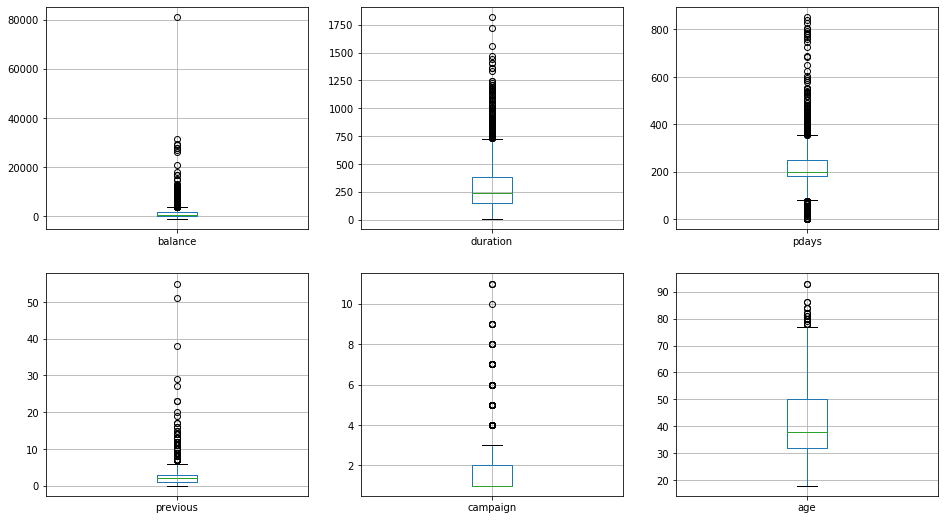

In [15]:
# Check which non-binary attibutes have outliers using subplots
# Attibutes with outliers are those that have values outside of the min and max whiskers on the boxplots

fig = plt.figure(figsize=(16,9))

# Plot balance
bp1 = fig.add_subplot(2, 3, 1)
df.boxplot(column=['balance'])

# Plot duration
bp2 = fig.add_subplot(2, 3, 2)
df.boxplot(column=['duration'])

# Plot pdays
bp3 = fig.add_subplot(2, 3, 3)
df.boxplot(column=['pdays'])

# Plot duration
bp4 = fig.add_subplot(2, 3, 4)
df.boxplot(column=['previous'])

# Plot pdays
bp5 = fig.add_subplot(2, 3, 5)
df.boxplot(column=['campaign'])

# Plot pdays
bp6 = fig.add_subplot(2, 3, 6)
df.boxplot(column=['age'])

plt.show()

# The six attributtes have outliers

In [16]:
# Use `RobustScaler` to the six attributes that have outliers

robust_scaler = RobustScaler()
df[['age','balance', 
    'duration', 'campaign', 'pdays', 'previous']] = robust_scaler.fit_transform(df[['age','balance', 
                               'duration', 'campaign', 'pdays', 'previous']])

In [17]:
# Bring other attibutes without outliers into the interval [0,1] by dividing by the max value
# day ranges from 1-31 so I subtract 1 from day before dividing by 30 so that 0 is day 1

df['education'] = df['education']/2
df['day'] = (df['day']-1)/30
df['month'] = df['month']/11

## E. Treatment of Outliers

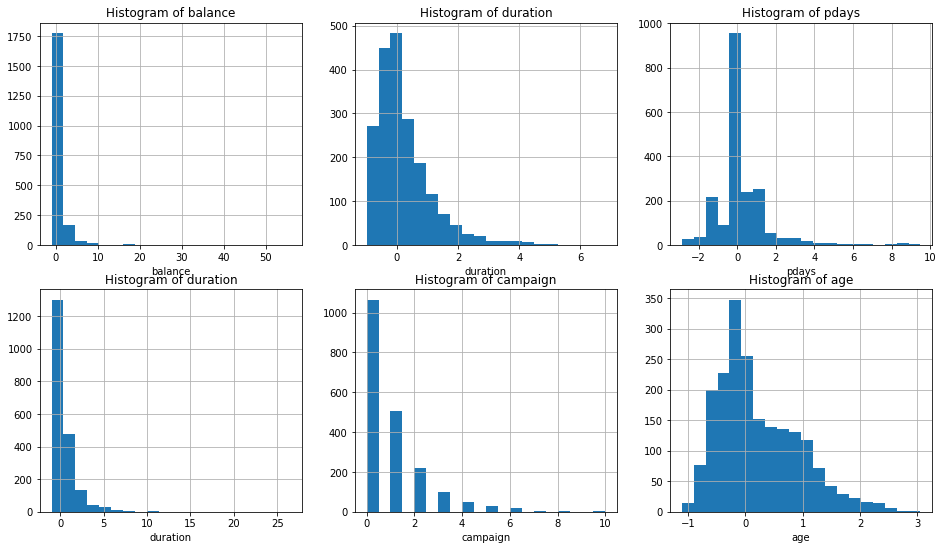

In [18]:
# Create a figure with six histograms for the attributes that have outliers

fig = plt.figure(figsize=(16,9))

# Plot balance
hs1 = fig.add_subplot(2, 3, 1)
hs1.set_title("Histogram of balance")
hs1.set_xlabel('balance')
df['balance'].hist(bins=20)

# Plot duration
hs2 = fig.add_subplot(2, 3, 2)
hs2.set_title("Histogram of duration")
hs2.set_xlabel('duration')
df['duration'].hist(bins=20)

# Plot pdays
hs3 = fig.add_subplot(2, 3, 3)
hs3.set_title("Histogram of pdays")
hs3.set_xlabel('pdays')
df['pdays'].hist(bins=20)

# Plot duration
hs4 = fig.add_subplot(2, 3, 4)
hs4.set_title("Histogram of duration")
hs4.set_xlabel('duration')
df['previous'].hist(bins=20)

# Plot campaign
hs5 = fig.add_subplot(2, 3, 5)
hs5.set_title("Histogram of campaign")
hs5.set_xlabel('campaign')
df['campaign'].hist(bins=20)

# Plot age
hs6 = fig.add_subplot(2, 3, 6)
hs6.set_title("Histogram of age")
hs6.set_xlabel('age')
df['age'].hist(bins=20)

plt.show()

In [19]:
# Verify the minimum value of each attribute

df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].min()

age        -1.111111
balance    -1.060984
duration   -0.982833
campaign    0.000000
pdays      -2.869565
previous   -1.000000
dtype: float64

In [20]:
# Use a log transformation to decrease the impact of outliers taking account of the minimum values

df['age'] = np.log(df['age']+2.12)
df['balance'] = np.log(df['balance']+2.07)
df['duration'] = np.log(df['duration']+1.99)
df['campaign'] = np.log(df['campaign']+1)
df['pdays'] = np.log(df['pdays']+3.87)
df['previous'] = np.log(df['previous']+2)


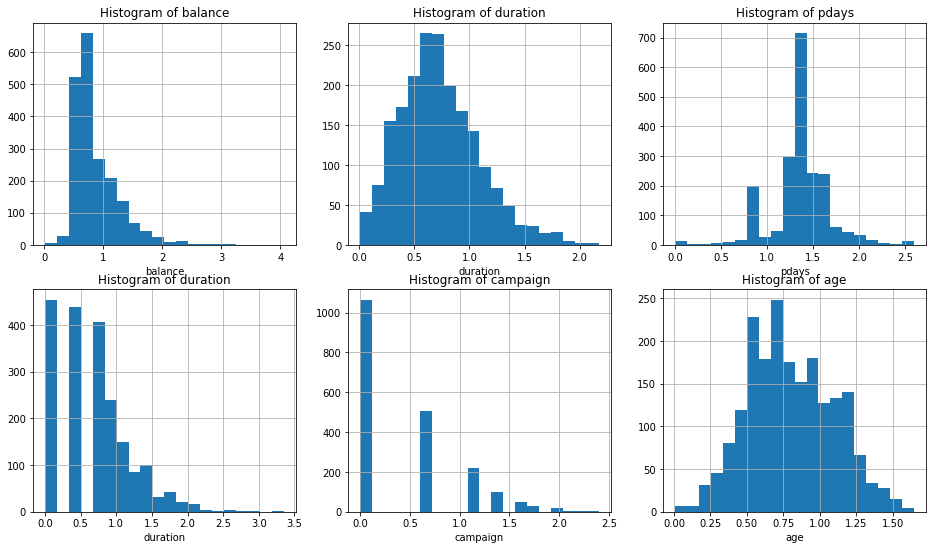

In [21]:
# Recreate the figure with of the six histograms with attributes that have outliers
# to verify that the range is within the same magnitude as the attributes without outliers

fig = plt.figure(figsize=(16,9))

# Plot balance
hs1 = fig.add_subplot(2, 3, 1)
hs1.set_title("Histogram of balance")
hs1.set_xlabel('balance')
df['balance'].hist(bins=20)

# Plot duration
hs2 = fig.add_subplot(2, 3, 2)
hs2.set_title("Histogram of duration")
hs2.set_xlabel('duration')
df['duration'].hist(bins=20)

# Plot pdays
hs3 = fig.add_subplot(2, 3, 3)
hs3.set_title("Histogram of pdays")
hs3.set_xlabel('pdays')
df['pdays'].hist(bins=20)

# Plot duration
hs4 = fig.add_subplot(2, 3, 4)
hs4.set_title("Histogram of duration")
hs4.set_xlabel('duration')
df['previous'].hist(bins=20)

# Plot campaign
hs5 = fig.add_subplot(2, 3, 5)
hs5.set_title("Histogram of campaign")
hs5.set_xlabel('campaign')
df['campaign'].hist(bins=20)

# Plot age
hs6 = fig.add_subplot(2, 3, 6)
hs6.set_title("Histogram of age")
hs6.set_xlabel('age')
df['age'].hist(bins=20)

plt.show()

## F. Creation of Derived Features

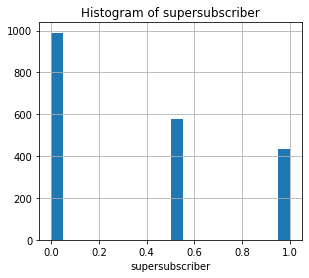

In [22]:
# Create a new feature 'supersubscriber' as the sum of current and previous campaign subsriptions

df['supersubscriber'] = (df['poutcome_success'] + df['subscribed_yes'])

# Rescale the 'supersubscriber' attribute to [0,1] by dividing by 2

df['supersubscriber'] = df['supersubscriber']/2

# Plot the 'supersubscriber' attribute

fig = plt.figure(figsize=(16,4))
hs7 = fig.add_subplot(1, 3, 1)
hs7.set_title("Histogram of supersubscriber")
hs7.set_xlabel('supersubscriber')
df['supersubscriber'].hist(bins=20)

# G. Save the Prepared Dataset

In [23]:
# With all attribute values within the scale magnitude and all NaNs treaded appropriately 
# so that my dataset is ready for machine learning analysis
# I will export my prepared bank dataset as a .csv file

df.to_csv('C:\\Users\\Paul\\Dropbox (Personal)\\College\\Year2\\4CT5157\\Week2/bank_prepared.csv')